## Importing dataset from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle .kaggle

In [ ]:
import json
token = {"username":"rikeadelia","key":"fea2c81cab3e56041c74635dd47645f9"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [ ]:
!kaggle datasets download -d minhhuy2810/rice-diseases-image-dataset -p /content

100% 12.0G/12.0G [04:52<00:00, 62.5MB/s]
100% 12.0G/12.0G [04:52<00:00, 43.9MB/s]


In [ ]:
!unzip rice-diseases-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_133841.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_133953.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_133956.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134124.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134125.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134126.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134128.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134129.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_20190424_134130.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2992.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2993.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2998.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_2999.jpg  
  inflating: LabelledRice/Labelled/BrownSpot/IMG_3017.jpg  
  inflatin

In [ ]:
!rm rice-diseases-image-dataset.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## The Model

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/RiceDiseaseDataset/train/',  # This is the source directory for training images
        target_size=(128,128),
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/RiceDiseaseDataset/validation/',  # This is the source directory for training images
        target_size=(128,128),
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


In [1]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # keras.layers.Conv2D(64, (3,3), activation='relu'),
    # keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])
opt = keras.optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

NameError: ignored

In [ ]:
save_callback = keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/bangkit/trial3.hdf5",
    monitor="val_accuracy",
    verbose=0,
    save_best_only=False,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch"
)
logger = keras.callbacks.CSVLogger("/content/drive/My Drive/bangkit/log_trial3.csv")


In [ ]:
history = model.fit(
      train_generator,
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
    callbacks=[save_callback,logger]
)

Epoch 1/30
25/25 [==============================] - 191s 8s/step - loss: 1.3232 - accuracy: 0.3406 - val_loss: 1.2513 - val_accuracy: 0.3943
Epoch 2/30
25/25 [==============================] - 195s 8s/step - loss: 1.1948 - accuracy: 0.4275 - val_loss: 1.2521 - val_accuracy: 0.3699
Epoch 3/30
25/25 [==============================] - 193s 8s/step - loss: 1.1797 - accuracy: 0.4300 - val_loss: 1.2216 - val_accuracy: 0.3699
Epoch 4/30
25/25 [==============================] - 192s 8s/step - loss: 1.1722 - accuracy: 0.4494 - val_loss: 1.2645 - val_accuracy: 0.4085
Epoch 5/30
25/25 [==============================] - 190s 8s/step - loss: 1.2165 - accuracy: 0.4150 - val_loss: 1.3407 - val_accuracy: 0.3211
Epoch 6/30
25/25 [==============================] - 190s 8s/step - loss: 1.1903 - accuracy: 0.4206 - val_loss: 1.2117 - val_accuracy: 0.4431
Epoch 7/30
25/25 [==============================] - 191s 8s/step - loss: 1.1468 - accuracy: 0.4625 - val_loss: 1.2381 - val_accuracy: 0.4085
Epoch 8/30
25

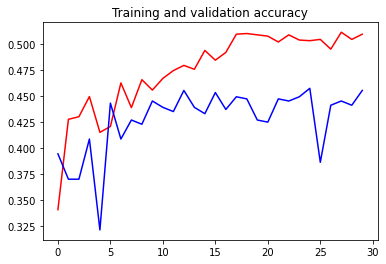

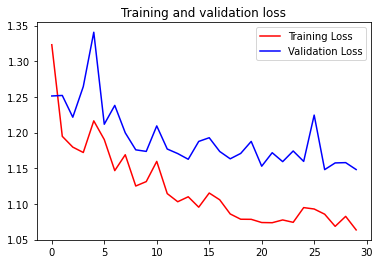

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# plt.show()
plt.savefig('/content/drive/My Drive/bangkit/plot_trial3.png')